<a href="https://colab.research.google.com/github/stutii21/DataScienceWinterProject-2023/blob/main/231040_Stuti/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

url = "/content/Social_Network_Ads.csv"
df = pd.read_csv(url)


X = df.iloc[:, [2, 3]].values  # Age and EstimatedSalary
y = df.iloc[:, -1].values  # Purchased

#  train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression from scratch

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []

    for _ in range(iterations):
        gradient = (1 / m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= learning_rate * gradient
        costs.append(cost_function(X, y, theta))

    return theta, costs

X_train_bias = np.c_[np.ones((len(X_train), 1)), X_train]

theta_initial = np.zeros(X_train_bias.shape[1])

learning_rate = 0.01
iterations = 1000
theta_trained, costs = gradient_descent(X_train_bias, y_train, theta_initial, learning_rate, iterations)

# Predictions
X_test_bias = np.c_[np.ones((len(X_test), 1)), X_test]
predictions_scratch = np.round(sigmoid(X_test_bias @ theta_trained))

# Calculate accuracy
accuracy_scratch = accuracy_score(y_test, predictions_scratch)

# Logistic Regression using scikit-learn

# Without normalization or standardization
model_sklearn_raw = LogisticRegression(random_state=42)
model_sklearn_raw.fit(X_train, y_train)
predictions_raw = model_sklearn_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, predictions_raw)

# With normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model_sklearn_normalized = LogisticRegression(random_state=42)
model_sklearn_normalized.fit(X_train_normalized, y_train)
predictions_normalized = model_sklearn_normalized.predict(X_test_normalized)
accuracy_normalized = accuracy_score(y_test, predictions_normalized)

# With standardization
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

model_sklearn_standardized = LogisticRegression(random_state=42)
model_sklearn_standardized.fit(X_train_standardized, y_train)
predictions_standardized = model_sklearn_standardized.predict(X_test_standardized)
accuracy_standardized = accuracy_score(y_test, predictions_standardized)

# Compare accuracies
print(f"Accuracy (Logistic Regression Scratch): {accuracy_scratch:.2%}")
print(f"Accuracy (Logistic Regression Sklearn - Raw): {accuracy_raw:.2%}")
print(f"Accuracy (Logistic Regression Sklearn - Normalized): {accuracy_normalized:.2%}")
print(f"Accuracy (Logistic Regression Sklearn - Standardized): {accuracy_standardized:.2%}")


Accuracy (Logistic Regression Scratch): 60.83%
Accuracy (Logistic Regression Sklearn - Raw): 60.83%
Accuracy (Logistic Regression Sklearn - Normalized): 84.17%
Accuracy (Logistic Regression Sklearn - Standardized): 85.00%


<ipython-input-7-793d62216fa2>:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-7-793d62216fa2>:26: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
<ipython-input-7-793d62216fa2>:26: RuntimeWarning: invalid value encountered in matmul
  cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))


*Let's begin by importing numpy, pandas and matplotlib.*

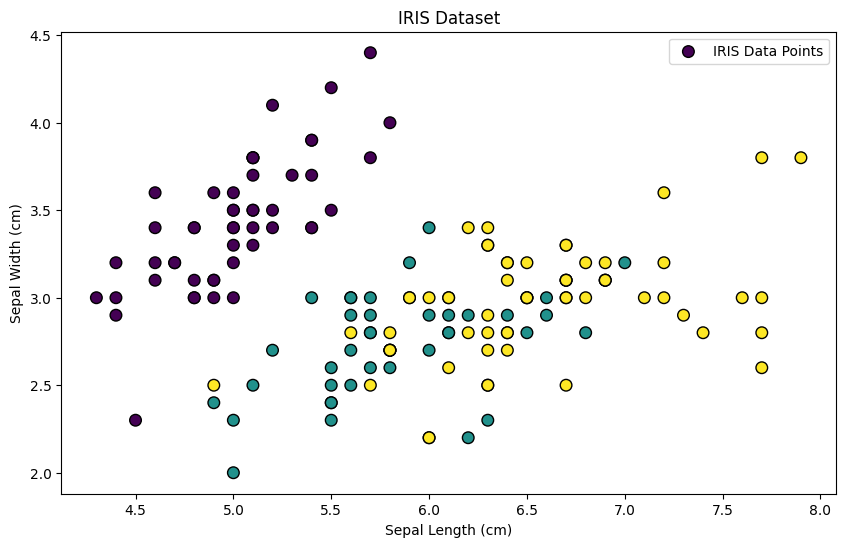

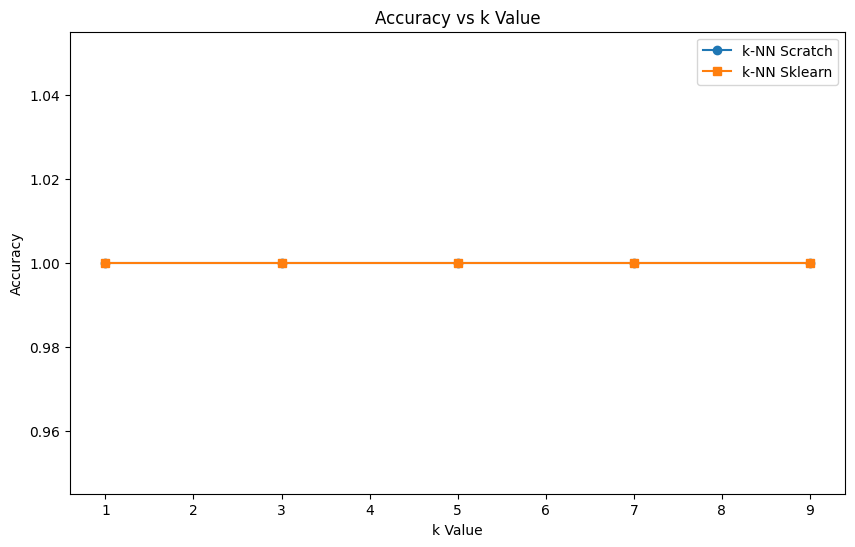

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


file_path = "/content/Iris.csv"
df = pd.read_csv(file_path)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])


X = df.iloc[:, :4].values  # Features
y = df.iloc[:, -1].values  # Target variable

#  train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=70, label='IRIS Data Points')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('IRIS Dataset')
plt.legend()
plt.show()

# k-NN from scratch

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x, x_test) for x in X_train]
    indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[indices]
    unique, counts = np.unique(k_nearest_labels, return_counts=True)
    return unique[np.argmax(counts)]

# Predictions
k_values = [1, 3, 5, 7, 9]
accuracy_scores_scratch = []


for k in k_values:
    predictions_scratch = [k_nearest_neighbors(X_train, y_train, x_test, k) for x_test in X_test]
    accuracy_scratch = accuracy_score(y_test, predictions_scratch)
    accuracy_scores_scratch.append(accuracy_scratch)

# k-NN using scikit-learn

accuracy_scores_sklearn = []

for k in k_values:
    model_sklearn = KNeighborsClassifier(n_neighbors=k)
    model_sklearn.fit(X_train, y_train)
    predictions_sklearn = model_sklearn.predict(X_test)
    accuracy_sklearn = accuracy_score(y_test, predictions_sklearn)
    accuracy_scores_sklearn.append(accuracy_sklearn)

# Plot accuracy vs k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_scratch, label='k-NN Scratch', marker='o')
plt.plot(k_values, accuracy_scores_sklearn, label='k-NN Sklearn', marker='s')
plt.title('Accuracy vs k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

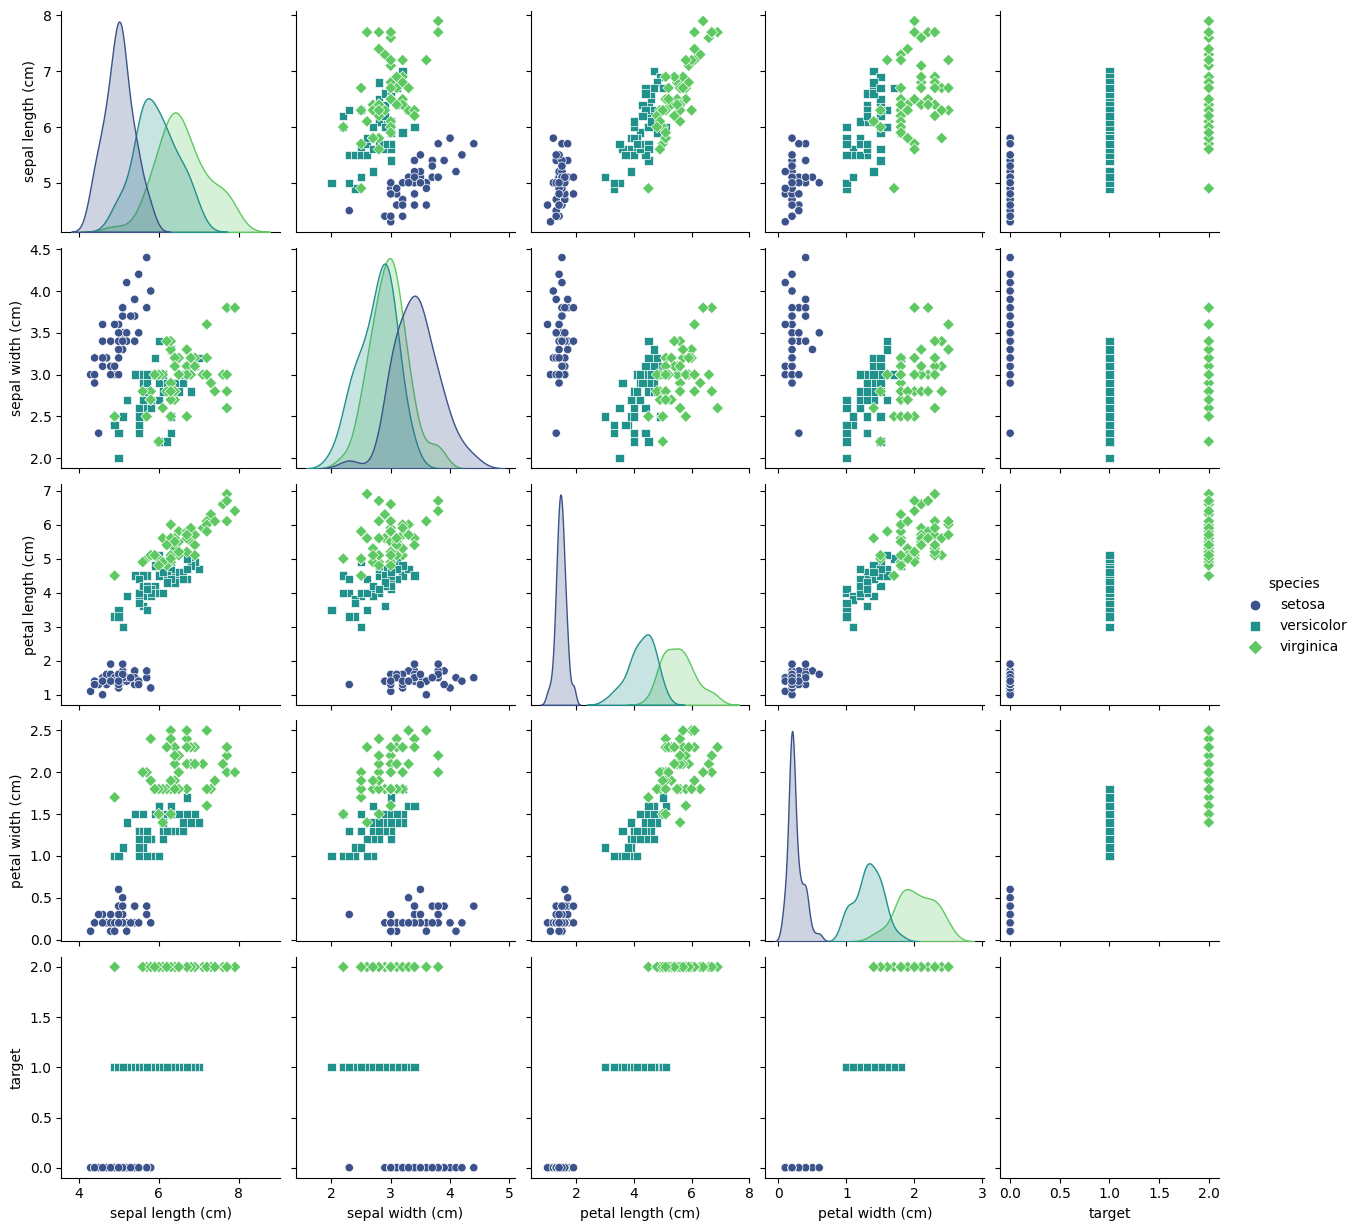

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

file_path = "/content/Iris.csv"
df = pd.read_csv(file_path)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

#  target variable to species names
target_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['target'].map(target_mapping)

# Create a pair plot
sns.pairplot(df, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.show()


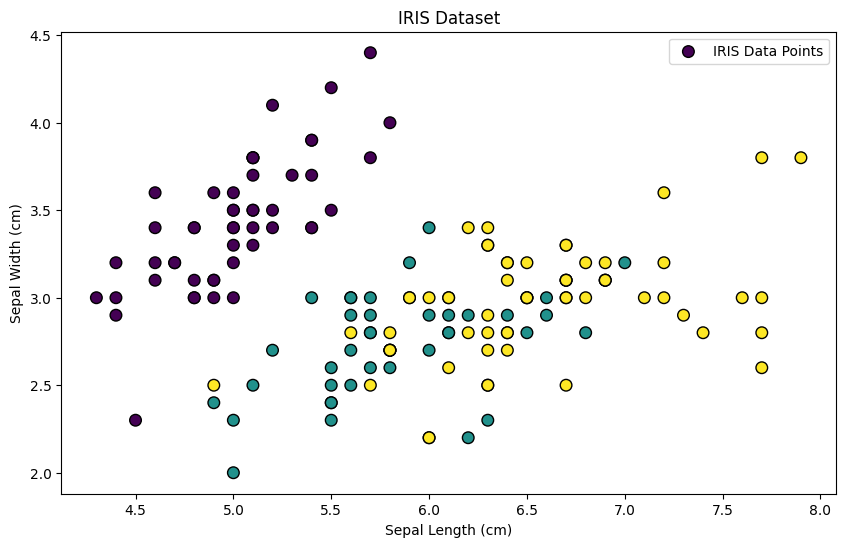

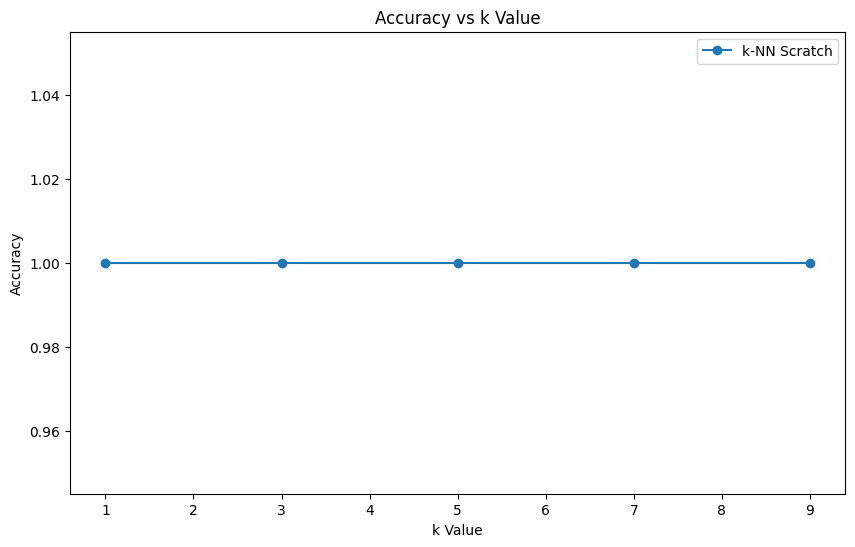

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

file_path = "/content/Iris.csv"
df = pd.read_csv(file_path)

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  columns= iris['feature_names'] + ['target'])

X = df.iloc[:, :4].values  # Features
y = df.iloc[:, -1].values  # Target variable

# train and test sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# k-NN from scratch


#  dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=70, label='IRIS Data Points')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('IRIS Dataset')
plt.legend()
plt.show()

# k-NN from scratch

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x, x_test) for x in X_train]
    indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[indices]
    unique, counts = np.unique(k_nearest_labels, return_counts=True)
    return unique[np.argmax(counts)]

# Predictions
k_values = [1, 3, 5, 7, 9]
accuracy_scores_scratch = []

for k in k_values:
    predictions_scratch = [k_nearest_neighbors(X_train, y_train, x_test, k) for x_test in X_test]
    accuracy_scratch = accuracy_score(y_test, predictions_scratch)
    accuracy_scores_scratch.append(accuracy_scratch)

# Plot accuracy vs k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores_scratch, label='k-NN Scratch', marker='o')
plt.title('Accuracy vs k Value')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
